# Airline on-time performance


> **Report date : February, 2023**     
> **Written by : [Ekoue LOGOSU-TEKO](https://www.linkedin.com/in/ekouelogosuteko/?locale=en_US)**


## Investigation Overview
In this investigation, I wanted to analyse planes on-time performance. More specifically, I wanted to understand which factors are involved in a plane departure delay, the main focus of the investigation, from an airport. The investigation showed that departure delay and arrival delay have a high a positive correlation, which mean an increase on departure delay cause an increase in arrival delay, which is why arrival delay correlation with other variables wasn't a target of in-depth investigation.


## Dataset Overview
The data reports flights in the US, including carriers, arrival and departure delays, and reasons for delays from 2005 to 2008. It total weight is 2.12 Gb.         
It is downloaded from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)                     
Its features can be consulted [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D)
After data wrangling, the are 17014015 flights and 41 features left. Those flights data were saved in to allow them to be used in this explanatory notebook.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
saved_datasets_folder="datasets/saved"

clean_flight_df = pd.read_csv("{}/clean_flight_df.csv".format(saved_datasets_folder))
clean_flight_df.head().T

,0,1,2,3,4
Year,2005,2005,2005,2005,2005
Month,1,1,1,1,1
DayofMonth,28,15,19,31,19
DayOfWeek,5,6,3,1,3
DepTime,1603,1733,807,759,1008
CRSDepTime,1605,1734,805,805,1010
ArrTime,1741,1909,912,859,1240
CRSArrTime,1759,1914,910,910,1258
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,541,557,559,559,559


In [22]:
airport_df = pd.read_csv("datasets/airports.csv")
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [11]:
clean_flight_df["DepDelay" ].describe()

count    1.701402e+07
mean     1.124161e+01
std      3.539982e+01
min     -1.200000e+03
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64

In [14]:
1.1e1

11.0

In [12]:
clean_flight_df["ArrDelay" ].describe()

count    1.701402e+07
mean     1.044785e+01
std      3.860349e+01
min     -6.920000e+02
25%     -9.000000e+00
50%      0.000000e+00
75%      1.500000e+01
max      2.598000e+03
Name: ArrDelay, dtype: float64

In [16]:
1.5e1

15.0

## Exploring departure delay and arrival delay distribution

Departure delay and Arrival delay have a high positive correlation because of the ripple effect. 75% of planes have a departure delay of 11 minutes, while for 75% of planes the arrival delay is 15 minutes. Plotted on a logarithmic scale, the distribution of depature and arrival delays is skewed toward the right, with many spikes on the first half of the plots. Those spikes should suggest the usual delay of the majority of planes.          
For the follow up of the analysis, the focus will be on departure delay, since we already know by its correlation with arrival delay that they two will increase together.

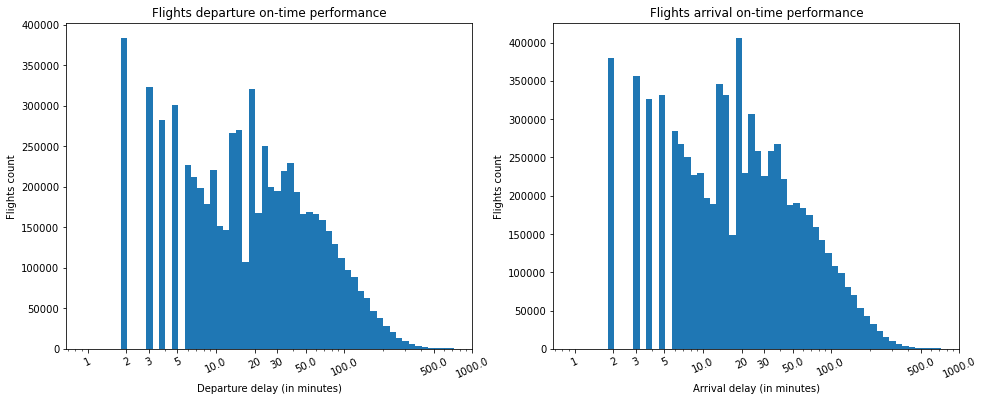

In [4]:
# Compare departure delay and arrival delay side by side

plt.figure(figsize=[16,6])

binsize = 0.05 
min_ = 0.005 
max_ = np.log10(clean_flight_df["DepDelay"].max())+ binsize   
bins = 10**np.arange(min_, max_, binsize)
#bins
xticks= {
    "values":[1,2,3, 10e0/2, 10e0, 20, 30, 10e1/2, 10e1,  10e2/2, 10e2,   10e3/2, 10e3],
    "labels":[1,2,3, 5,      10.0, 20, 30, 50.0,   100.0, 500.0,  1000.0, 5000.0, 10000.0]
}


# ===========================





# Departure delay histogram

plt.subplot(1,2,1) # plot on the left
plt.hist(data=clean_flight_df, x="DepDelay", bins=bins)

plt.xscale("log")

plt.xticks(xticks["values"], xticks["labels"],rotation=25)

plt.xlim(0, 10e2)

plt.xlabel("Log value of Departure delay (in minutes)")
plt.ylabel("Flights count")
plt.title("Flights departure on-time performance");

#-------------------------------

# Arrival delay histogram

plt.subplot(1,2,2) # plot on the right
plt.hist(data=clean_flight_df, x="ArrDelay", bins=bins)

plt.xscale("log")

plt.xticks(xticks["values"], xticks["labels"],rotation=25)

plt.xlim(0, 10e2)

plt.xlabel("Log value of Arrival delay (in minutes)")
plt.ylabel("Flights count")
plt.title("Flights arrival on-time performance");

## Carriers involvement in departure delay
For one reason or another, each freight company planes tend to perform differently than others in term of departure delay. For example, some companies planes usually depart before or less than 05 minutes after the scheduled time, some companies planes tend to depart 15 to 17 minutes after the scheduled time, whereas there are companies' planes which tend to depart around 10 minutes after the scheduled time. It is worth to ponder why.

In [18]:
delay_variables = ["DepDelay","CarrierDelay","WeatherDelay","NASDelay","NASDelay","LateAircraftDelay", "OtherDelay"] 
delay_variables

['DepDelay',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'NASDelay',
 'LateAircraftDelay',
 'OtherDelay']

In [19]:
# Mean delays of planes groupbed per carrier
mean_delays_per_carrier = clean_flight_df[ ["UniqueCarrierDesc"]+delay_variables ] \
                                  .groupby("UniqueCarrierDesc") \
                                  .mean() \
                                  .reset_index() \
                                  .sort_values(by="DepDelay" ,ascending=False)

mean_delays_per_carrier

,UniqueCarrierDesc,DepDelay,CarrierDelay,WeatherDelay,NASDelay,NASDelay,LateAircraftDelay,OtherDelay
6,Atlantic Southeast Airlines,17.637066,8.262367,3.064043,4.820048,4.820048,2.336583,-23.303090
15,Mesa Airlines Inc.,14.405149,7.113139,0.649411,2.616858,2.616858,6.497436,-19.493701
14,JetBlue Airways,14.112793,3.075234,0.534728,7.266785,7.266785,7.829045,-25.972576
20,United Air Lines Inc.,13.066905,3.835629,0.422398,4.781349,4.781349,7.017973,-20.838698
5,American Eagle Airlines Inc.,12.818229,3.906169,0.902901,4.672946,4.672946,6.894867,-21.049829
0,AirTran Airways Corporation,12.368125,2.184800,0.143274,5.046056,5.046056,8.058647,-20.478833
18,Southwest Airlines Co.,12.304093,2.208318,0.439631,1.610370,1.610370,6.628416,-12.497105
4,American Airlines Inc.,12.267529,3.628055,1.027536,5.202703,5.202703,5.713186,-20.774184
1,Alaska Airlines Inc.,11.565889,5.192881,0.216086,2.751659,2.751659,6.203887,-17.116173
8,Continental Air Lines Inc.,11.304467,2.988633,0.705127,7.085121,7.085121,4.387411,-22.251413


In [20]:
# Renaming the features to give them more expressive names
mean_delays_per_carrier.rename(columns={
    "DepDelay":"MeanDepDelay",
    "CarrierDelay": "MeanCarrierDelay",
    "WeatherDelay": "MeanWeatherDelay",
    "NASDelay":"MeanNASDelay",
    "SecurityDelay" : "MeanSecurityDelay",
    "LateAircraftDelay": "MeanLateAircraftDelay",
    "OtherDelay": "MeanOtherDelay"
},inplace=True)

mean_delays_per_carrier.head().T

,6,15,14,20,5
UniqueCarrierDesc,Atlantic Southeast Airlines,Mesa Airlines Inc.,JetBlue Airways,United Air Lines Inc.,American Eagle Airlines Inc.
MeanDepDelay,17.637066,14.405149,14.112793,13.066905,12.818229
MeanCarrierDelay,8.262367,7.113139,3.075234,3.835629,3.906169
MeanWeatherDelay,3.064043,0.649411,0.534728,0.422398,0.902901
MeanNASDelay,4.820048,2.616858,7.266785,4.781349,4.672946
MeanNASDelay,4.820048,2.616858,7.266785,4.781349,4.672946
MeanLateAircraftDelay,2.336583,6.497436,7.829045,7.017973,6.894867
MeanOtherDelay,-23.30309,-19.493701,-25.972576,-20.838698,-21.049829


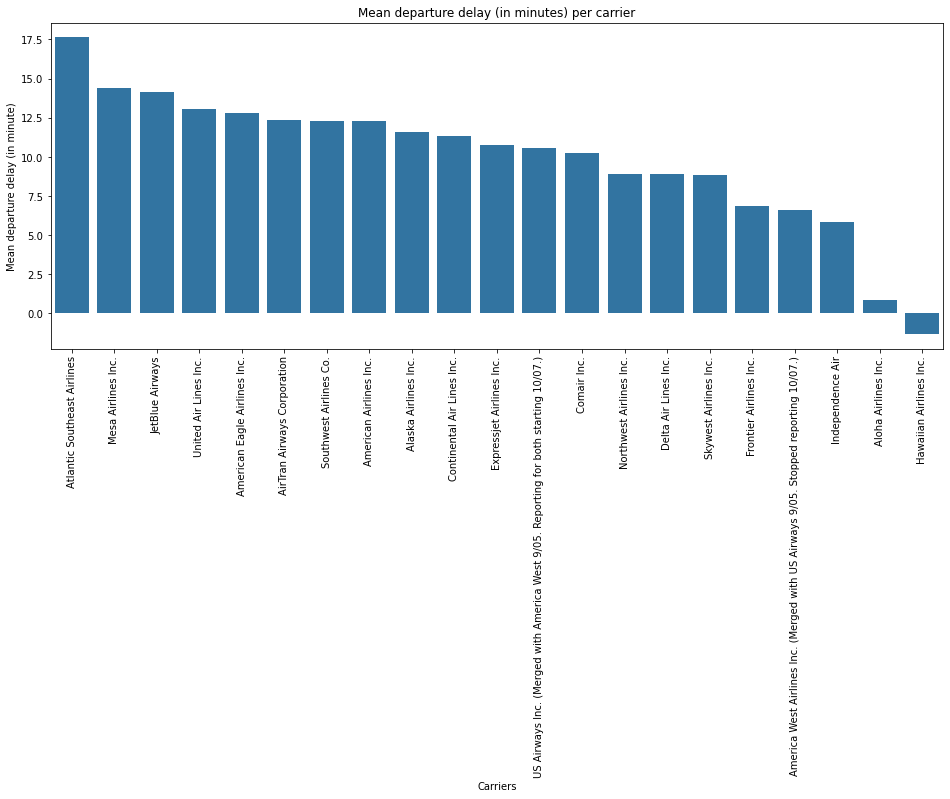

In [21]:
plt.figure(figsize=[16,6])
sb.barplot(data=mean_delays_per_carrier,x="UniqueCarrierDesc",y="MeanDepDelay", color=sb.color_palette()[0])

plt.xticks(rotation=90)

plt.xlabel("Carriers")
plt.ylabel("Mean departure delay (in minute)")
plt.title("Mean departure delay (in minutes) per carrier");

## Cities involvement in the departure delay of planes
I found during my investigation that the departure delay is nearly similar for many cities, while there are cities whose departure delay are either better or worst than than the others. From this, I can conclude that the city play a role in planes on-time performance. 

In [23]:
clean_flight_with_departurecity = clean_flight_df.merge(airport_df, how="inner", left_on="Origin", right_on="iata")
clean_flight_with_departurecity.head().T

,0,1,2,3,4
Year,2005,2005,2005,2005,2005
Month,1,1,1,2,3
DayofMonth,28,1,13,2,22
DayOfWeek,5,6,4,3,2
DepTime,1603,1306,1807,1554,805
CRSDepTime,1605,1310,1605,1605,810
ArrTime,1741,1454,2103,1741,949
CRSArrTime,1759,1458,1759,1759,1003
UniqueCarrier,UA,UA,UA,UA,UA
FlightNum,541,539,541,541,529


In [24]:
# Departure delay per city
depdelays_per_city = clean_flight_with_departurecity[ ["city"]+delay_variables ] \
                                  .groupby("city") \
                                  .mean() \
                                  .reset_index() \
                                  .sort_values(by="DepDelay" ,ascending=False)

depdelays_per_city

,city,DepDelay,CarrierDelay,WeatherDelay,NASDelay,NASDelay,LateAircraftDelay,OtherDelay
56,Clarksburg,130.000000,130.000000,0.000000,0.000000,0.000000,0.000000,-130.000000
200,Ogden,108.000000,87.000000,0.000000,0.000000,0.000000,0.000000,-87.000000
52,Cheyenne,105.000000,0.000000,44.000000,0.000000,0.000000,0.000000,-44.000000
185,Muskegon,47.071429,21.071429,6.714286,2.000000,2.000000,15.928571,-47.714286
187,Nantucket,37.600904,4.329819,0.688253,24.174699,24.174699,14.906627,-68.274096
...,...,...,...,...,...,...,...,...
210,Pellston,-2.000000,0.000000,0.000000,31.000000,31.000000,0.000000,-62.000000
274,Visalia,-2.050000,1.505263,0.089474,0.239474,0.239474,0.544737,-2.618421
218,Pocatello,-2.354656,1.357287,0.631174,0.568421,0.568421,1.463968,-4.589271
117,Hilo,-2.589956,0.875100,0.028788,0.077186,0.077186,1.400410,-2.458671


In [25]:
# Renaming the features to give them more appropriate names
depdelays_per_city.rename(columns={
    "DepDelay":"MeanDepDelay",
    "CarrierDelay": "MeanCarrierDelay",
    "WeatherDelay": "MeanWeatherDelay",
    "NASDelay":"MeanNASDelay",
    "SecurityDelay" : "MeanSecurityDelay",
    "LateAircraftDelay": "MeanLateAircraftDelay",
    "OtherDelay": "MeanOtherDelay"
},inplace=True)

depdelays_per_city.head().T

,city,MeanDepDelay,MeanCarrierDelay,MeanWeatherDelay,MeanNASDelay,MeanNASDelay,MeanLateAircraftDelay,MeanOtherDelay
56,Clarksburg,130.000000,130.000000,0.000000,0.000000,0.000000,0.000000,-130.000000
200,Ogden,108.000000,87.000000,0.000000,0.000000,0.000000,0.000000,-87.000000
52,Cheyenne,105.000000,0.000000,44.000000,0.000000,0.000000,0.000000,-44.000000
185,Muskegon,47.071429,21.071429,6.714286,2.000000,2.000000,15.928571,-47.714286
187,Nantucket,37.600904,4.329819,0.688253,24.174699,24.174699,14.906627,-68.274096


In [26]:
# Cities with bad departure delay
cities_with_top_depdelay = depdelays_per_city[ depdelays_per_city["MeanDepDelay"]>15 ]
cities_with_top_depdelay.shape

(38, 8)

In [28]:
print(cities_with_top_depdelay.head())
print(cities_with_top_depdelay.tail())

           city  MeanDepDelay  MeanCarrierDelay  MeanWeatherDelay  \
56   Clarksburg    130.000000        130.000000          0.000000   
200       Ogden    108.000000         87.000000          0.000000   
52     Cheyenne    105.000000          0.000000         44.000000   
185    Muskegon     47.071429         21.071429          6.714286   
187   Nantucket     37.600904          4.329819          0.688253   

     MeanNASDelay  MeanNASDelay  MeanLateAircraftDelay  MeanOtherDelay  
56       0.000000      0.000000               0.000000     -130.000000  
200      0.000000      0.000000               0.000000      -87.000000  
52       0.000000      0.000000               0.000000      -44.000000  
185      2.000000      2.000000              15.928571      -47.714286  
187     24.174699     24.174699              14.906627      -68.274096  
                               city  MeanDepDelay  MeanCarrierDelay  \
63   Columbus-Starkville-West Point     15.753609          6.514938   
253  

On this first plot for example, we can see cities where planes departure delay tend to be over 15 minutes. The first 03 cities tend to have delay over 100 minutes, and the 04th city usually have a delay of 40 minutes.
The other cities usual delay is about 20 minutes.

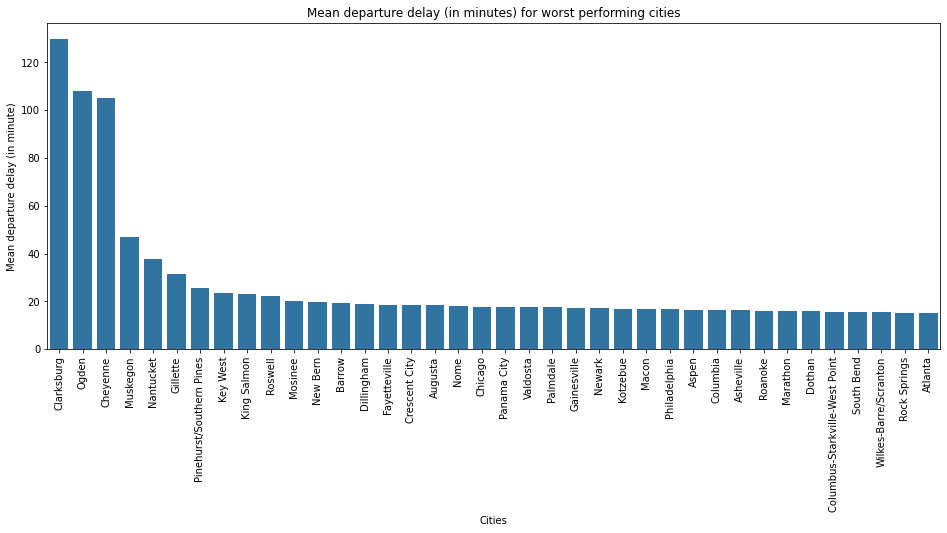

In [27]:
# Plot MeanDepDelay by departure city

plt.figure(figsize=[16,6])
sb.barplot(data=cities_with_top_depdelay,x="city",y="MeanDepDelay", color=sb.color_palette()[0])

# yticks= {
#     "values":[0, 10, 20, 30, 40, 60, 80, 100, 120, 130],
#     "labels":[0, 10, 20, 30, 40, 60, 80, 100, 120, 130]
# }

plt.xticks(rotation=90)
#plt.yticks(yticks["values"], yticks["labels"])

plt.xlabel("Cities")
plt.ylabel("Mean departure delay (in minute)")
plt.title("On-time performance (in minutes) for worst performing cities");

In [31]:
# Cities with low departure delay
cities_with_low_depdelay = depdelays_per_city[ depdelays_per_city["MeanDepDelay"]<=5 ]
cities_with_low_depdelay.shape

(44, 8)

In [32]:
print(cities_with_low_depdelay.head())
print(cities_with_low_depdelay.tail())

             city  MeanDepDelay  MeanCarrierDelay  MeanWeatherDelay  \
123      Imperial      4.882541          4.706352          0.435046   
145  Lake Charles      4.842675          2.322231          2.279989   
191     New Haven      4.662752          4.135906          1.270134   
237    San Angelo      4.648394          1.615259          0.798323   
27       Billings      4.430956          3.099025          0.569266   

     MeanNASDelay  MeanNASDelay  MeanLateAircraftDelay  MeanOtherDelay  
123      0.860198      0.860198               3.742419      -10.604213  
145      6.234227      6.234227               2.319523      -19.390198  
191      2.607383      2.607383               0.384228      -11.005034  
237      1.178769      1.178769               4.475148       -9.246267  
27       1.156624      1.156624               3.349653       -9.331192  
          city  MeanDepDelay  MeanCarrierDelay  MeanWeatherDelay  \
210   Pellston     -2.000000          0.000000          0.000000   

On this second plot, we have cities where planes usual departure delay span from 03 minutes before the scheduled time to 05 minutes after the scheduled time.

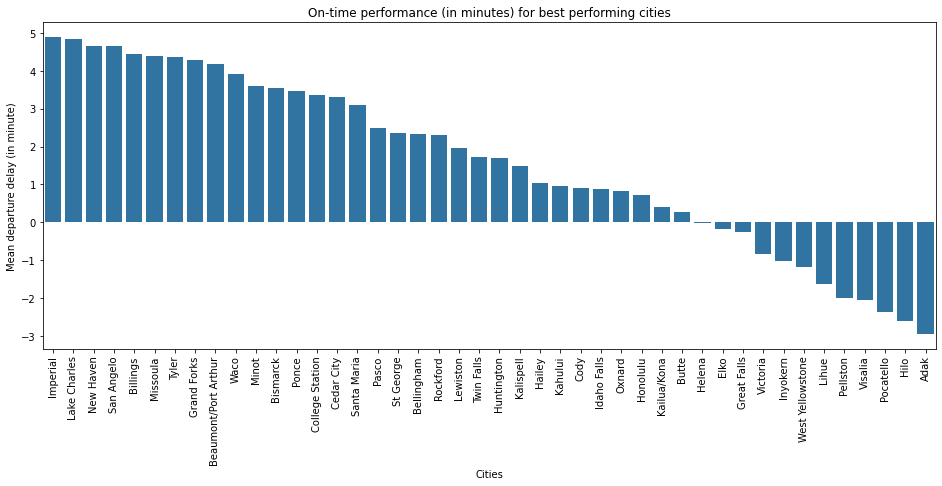

In [33]:
# Plot MeanDepDelay by departure city

plt.figure(figsize=[16,6])
sb.barplot(data=cities_with_low_depdelay,x="city",y="MeanDepDelay", color=sb.color_palette()[0])

# yticks= {
#     "values":[0, 10, 20, 30, 40, 60, 80, 100, 120, 130],
#     "labels":[0, 10, 20, 30, 40, 60, 80, 100, 120, 130]
# }

plt.xticks(rotation=90)
#plt.yticks(yticks["values"], yticks["labels"])

plt.xlabel("Cities")
plt.ylabel("Mean departure delay (in minute)")
plt.title("On-time performance (in minutes) for best performing cities");

## Weekday's impact on planes on-time performance
Planes tend to be more delayed Thursday and Friday, with a mean departure delay between 12 to nearly 14 minutes. The weekdays where to expect the less departure delay is Tuesday and Saturday, where the mean departure delay is around 09 minutes. For the other days, it is to be expected a mean depature delay of about 10 to lesser than 12 minutes.

In [40]:
# Setting order in our weekdays feature
ordered_days= ["Mon","Tue","Wed","Thurs","Frid","Sat","Sun"]
ordered_weekdays_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_days)
clean_flight_df["LiteralDayOfWeek"] = clean_flight_df["LiteralDayOfWeek"].astype(ordered_weekdays_variable)
clean_flight_df["LiteralDayOfWeek"].dtypes

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thurs', 'Frid', 'Sat', 'Sun'], ordered=True)

In [41]:
# Mean departure delay per weekday
depdelays_per_weekday = clean_flight_df[ ["LiteralDayOfWeek"]+delay_variables ] \
                                  .groupby("LiteralDayOfWeek") \
                                  .mean() \
                                  .reset_index() # \
                                  #.sort_values(by="DepDelay" ,ascending=False)

depdelays_per_weekday

,LiteralDayOfWeek,DepDelay,CarrierDelay,WeatherDelay,NASDelay,NASDelay,LateAircraftDelay,OtherDelay
0,Mon,11.702676,3.935748,0.813609,4.290784,4.290784,5.309632,-18.640557
1,Tue,9.342711,3.404251,0.709241,4.158215,4.158215,4.287225,-16.717146
2,Wed,10.486239,3.604972,0.805059,4.472995,4.472995,4.874506,-18.230528
3,Thurs,12.700718,4.076685,0.910663,5.017698,5.017698,5.890478,-20.913223
4,Frid,13.751094,4.407768,0.886176,4.866531,4.866531,6.212718,-21.239725
5,Sat,8.901228,3.962830,0.618851,2.643239,2.643239,3.649286,-13.517446
6,Sun,11.415517,4.188950,0.768544,3.788391,3.788391,5.004328,-17.538605


In [42]:
# Renaming the features to give them more appropriate names
depdelays_per_weekday.rename(columns={
    "DepDelay":"MeanDepDelay",
    "CarrierDelay": "MeanCarrierDelay",
    "WeatherDelay": "MeanWeatherDelay",
    "NASDelay":"MeanNASDelay",
    "SecurityDelay" : "MeanSecurityDelay",
    "LateAircraftDelay": "MeanLateAircraftDelay",
    "OtherDelay":"MeanOtherDelay"
},inplace=True)

depdelays_per_weekday.head().T

,0,1,2,3,4
LiteralDayOfWeek,Mon,Tue,Wed,Thurs,Frid
MeanDepDelay,11.702676,9.342711,10.486239,12.700718,13.751094
MeanCarrierDelay,3.935748,3.404251,3.604972,4.076685,4.407768
MeanWeatherDelay,0.813609,0.709241,0.805059,0.910663,0.886176
MeanNASDelay,4.290784,4.158215,4.472995,5.017698,4.866531
MeanNASDelay,4.290784,4.158215,4.472995,5.017698,4.866531
MeanLateAircraftDelay,5.309632,4.287225,4.874506,5.890478,6.212718
MeanOtherDelay,-18.640557,-16.717146,-18.230528,-20.913223,-21.239725


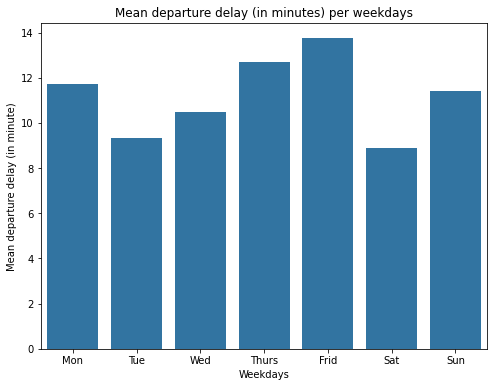

In [43]:
# Plot the mean departure delay per weekday

plt.figure(figsize=[8,6])

sb.barplot(data=depdelays_per_weekday,x="LiteralDayOfWeek",y="MeanDepDelay", color=sb.color_palette()[0])

# plt.xticks(rotation=90)

plt.xlabel("Weekdays")
plt.ylabel("Mean departure delay (in minute)")
plt.title("On-time performance (in minutes) per weekdays");

## Month's impact on planes on-time performance

The analysis shows that months are also a factor impacting planes' departure delay.          
May, September, October and November are the months with the less mean depature delay, ranging from 06 to 08 minutes. April and August are the next best ones, with a mean departure delay between 10 to 12 minutes. The other months have a slight higher departure delay.

In [44]:
# Setting order in our month feature
ordered_months= ["Jan","Feb","March","Apr","May","June","Jul","Aug","Sept","Oct","Nov","Dec"]
ordered_months_variable = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_months)
clean_flight_df["LiteralMonth"] = clean_flight_df["LiteralMonth"].astype(ordered_months_variable)
clean_flight_df["LiteralMonth"].dtypes

CategoricalDtype(categories=['Jan', 'Feb', 'March', 'Apr', 'May', 'June', 'Jul', 'Aug',
                  'Sept', 'Oct', 'Nov', 'Dec'],
, ordered=True)

In [45]:
# Mean departure delay per month
depdelays_per_month = clean_flight_df[ ["LiteralMonth"]+delay_variables ] \
                                  .groupby("LiteralMonth") \
                                  .mean() \
                                  .reset_index() #\
                                  #.sort_values(by="DepDelay" ,ascending=False)

depdelays_per_month

,LiteralMonth,DepDelay,CarrierDelay,WeatherDelay,NASDelay,NASDelay,LateAircraftDelay,OtherDelay
0,Jan,13.366590,4.712376,1.059343,5.133706,5.133706,5.888605,-21.927736
1,Feb,14.275961,4.851190,1.120969,5.202457,5.202457,6.389690,-22.766763
2,March,13.763841,4.605768,0.824234,4.886561,4.886561,6.150135,-21.353260
3,Apr,10.494060,3.865063,0.614807,4.082156,4.082156,4.822291,-17.466472
4,May,7.455892,2.829953,0.536499,3.090236,3.090236,3.581775,-13.128699
5,June,13.372117,4.288252,1.053214,4.632590,4.632590,5.883881,-20.490528
6,Jul,13.888303,4.458597,1.045561,4.547897,4.547897,6.237105,-20.837056
7,Aug,11.322705,3.967165,0.803739,3.868936,3.868936,5.122351,-17.631126
8,Sept,6.523100,2.916983,0.480897,3.045155,3.045155,3.179367,-12.667559
9,Oct,8.414641,3.096035,0.572662,3.835425,3.835425,3.913390,-15.252935


In [46]:
# Renaming the features to give them more appropriate names
depdelays_per_month.rename(columns={
    "DepDelay":"MeanDepDelay",
    "CarrierDelay": "MeanCarrierDelay",
    "WeatherDelay": "MeanWeatherDelay",
    "NASDelay":"MeanNASDelay",
    "SecurityDelay" : "MeanSecurityDelay",
    "LateAircraftDelay": "MeanLateAircraftDelay",
    "OtherDelay":"MeanOtherDelay"
},inplace=True)

depdelays_per_month.head().T

,0,1,2,3,4
LiteralMonth,Jan,Feb,March,Apr,May
MeanDepDelay,13.36659,14.275961,13.763841,10.49406,7.455892
MeanCarrierDelay,4.712376,4.85119,4.605768,3.865063,2.829953
MeanWeatherDelay,1.059343,1.120969,0.824234,0.614807,0.536499
MeanNASDelay,5.133706,5.202457,4.886561,4.082156,3.090236
MeanNASDelay,5.133706,5.202457,4.886561,4.082156,3.090236
MeanLateAircraftDelay,5.888605,6.38969,6.150135,4.822291,3.581775
MeanOtherDelay,-21.927736,-22.766763,-21.35326,-17.466472,-13.128699


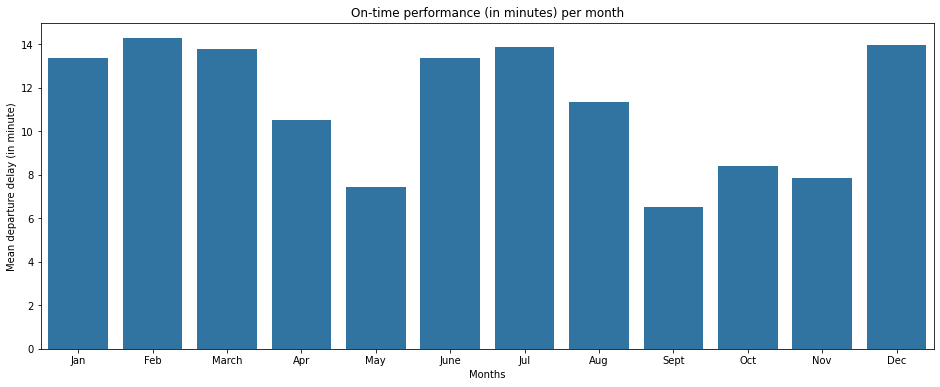

In [47]:
# Plot the mean departure delay per month

plt.figure(figsize=[16,6])

sb.barplot(data=depdelays_per_month,x="LiteralMonth",y="MeanDepDelay", color=sb.color_palette()[0])

# plt.xticks(rotation=90)

plt.xlabel("Months")
plt.ylabel("Mean departure delay (in minute)")
plt.title("On-time performance (in minutes) per month");

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [50]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

Le fichier sp‚cifi‚ est introuvable.


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
